<a href="https://colab.research.google.com/github/Jesenrique/ComputerVision1/blob/main/TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np

# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt
#from google.colab.patches import cv2_imshow
import cv2 as cv
import pandas as pd
import math


### 1. Graficar ambas representaciones para diferentes tamaños de kernel y sigma. Aplicar el filtro una imagen para validar el funcionamiento en el dominio espectral.

In [21]:
def create_gauss_filter(imagen,size,sigma):

  h, w = imagen.shape
  #creo el kernel gaussiano
  nucleo_g = cv.getGaussianKernel(ksize=size, sigma=sigma)
  kernel = nucleo_g * nucleo_g.T

  img=kernel.copy()

  r_padx=math.ceil((h-size)/2)
  padx=np.ones((r_padx,size))*0
  #agrego filas en parte superior
  img=np.insert(img,0,padx,axis=0)
  #verifico que el pad no sobre pase el tamaño de la img
  if h<((r_padx*2)+size):
    padx=np.ones((r_padx-1,size))*0
    img=np.append(img,padx,axis=0)
  else:
    img=np.append(img,padx,axis=0)

  c_pady=math.ceil((w-size)/2)
  pady=np.ones((img.shape[0],c_pady))*0
  #agrego columnas en el indice 0
  img=np.hstack((pady,img))
  #agrego columnas en la parte derecha
  if w<((c_pady*2)+size):
    pady=np.ones((img.shape[0],c_pady-1))*0
    img=np.append(img,pady,axis=1)
  else:
    img=np.append(img,pady,axis=1)
  #verifico dimensiones de salida
  #print(f"tamaño del kernel: {kernel.shape}\ntamaño de la imagen de salida: {img.shape}")

  plt.figure(figsize=(8,8))
  plt.subplot(1,3,1)
  plt.axis('off')
  plt.title("Kernel Gausiano")
  plt.imshow(img, cmap='jet')
  plt.subplot(1,3,2)
  plt.axis('off')
  plt.title("FFT del kernel")
  tf_shifted = np.fft.fftshift(np.fft.fft2(img))
  plt.imshow(np.abs(tf_shifted), cmap='jet')
  plt.subplot(1,3,3)
  plt.axis('off')
  plt.title('Desenfoque gausiano')
  filtered = np.fft.fft2(imagen) * np.fft.fft2(img)
  img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))
  plt.imshow(img_gauss, cmap='gray')

  return img_gauss

array([[181.475329  , 182.54967754, 183.69250193, ..., 179.56181738,
        179.90063868, 180.55810122],
       [202.17594352, 203.04842033, 203.89780602, ..., 200.41345404,
        200.77057903, 201.37705732],
       [216.51582845, 217.35250519, 218.03666664, ..., 214.51344238,
        214.96906508, 215.66407246],
       ...,
       [125.68534452, 127.70962969, 129.31292118, ..., 119.92205395,
        121.46840246, 123.48410819],
       [138.59993876, 140.44999822, 142.11933197, ..., 134.26357911,
        135.26645335, 136.78064984],
       [158.38933132, 159.84405659, 161.32231103, ..., 155.57985261,
        156.12099678, 157.09481246]])

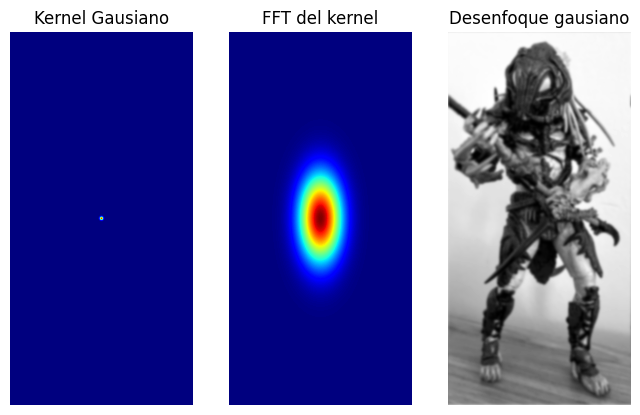

In [22]:
imagen = cv.imread('fft_alfa_pred.png', cv.IMREAD_GRAYSCALE)
create_gauss_filter(imagen,size=15,sigma=2)


array([[176.39294632, 177.19399697, 178.00094106, ..., 174.142093  ,
        174.82953638, 175.59403049],
       [186.53750242, 187.24113499, 187.93063341, ..., 184.53315476,
        185.14920594, 185.82734344],
       [196.20561266, 196.81692383, 197.41405853, ..., 194.44243389,
        194.99192872, 195.58490773],
       ...,
       [147.4257915 , 148.60678279, 149.78824161, ..., 144.10988781,
        145.11640187, 146.2396471 ],
       [156.42929529, 157.50764537, 158.5943501 , ..., 153.45106392,
        154.3425365 , 155.35388203],
       [166.22685795, 167.16426988, 168.11872014, ..., 163.66186161,
        164.42764519, 165.29985733]])

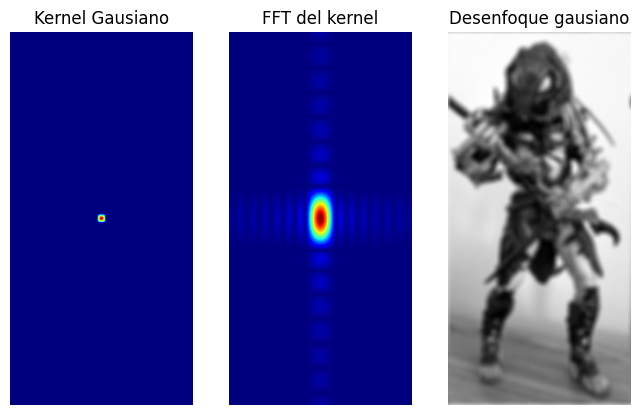

In [23]:
create_gauss_filter(imagen,size=15,sigma=5)

array([[175.56088744, 176.15975677, 176.75893507, ..., 173.73726278,
        174.32341353, 174.94137573],
       [181.47170355, 182.04387915, 182.61525071, ..., 179.73951591,
        180.29136433, 180.87888465],
       [187.10044199, 187.63543394, 188.17100758, ..., 185.48686341,
        186.00218786, 186.54933706],
       ...,
       [158.21303507, 158.83046038, 159.45846923, ..., 156.32567179,
        156.94077576, 157.57085881],
       [163.85778887, 164.47457158, 165.09907375, ..., 161.98622436,
        162.59498662, 163.22106596],
       [169.63447514, 170.23819171, 170.84467389, ..., 167.78885637,
        168.38707067, 169.01000138]])

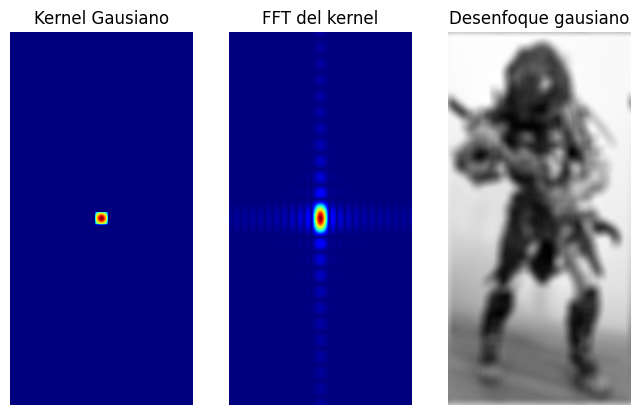

In [24]:
create_gauss_filter(imagen,size=23,sigma=10)

### 2.Usando el método descripto en el paper “Image Sharpness Measure for Blurred Images in Frequency Domain” comparar el resultado de un filtrado por convolución con el filtrado espectral.


In [25]:
import numpy as np
from scipy.fftpack import fft2, fftshift

def frequency_blur_measure(image):
    # pasos propuestos del metodo
    F = fft2(image)
    Fc = fftshift(F)
    AF = np.abs(Fc)
    M = np.max(AF)
    thres = M/1000
    TH = np.sum(AF > thres)
    
    fm = TH / (image.shape[0] * image.shape[1])

    return fm

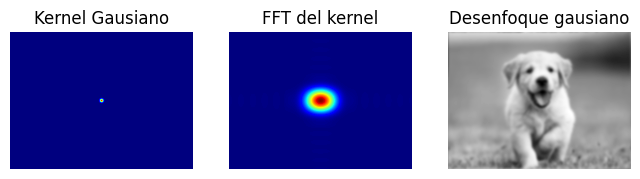

In [26]:
img_orig = cv.imread('perro.jpg', cv.IMREAD_GRAYSCALE)

img_g_filter=create_gauss_filter(img_orig,size=15,sigma=3)

medida para imagen original:  0.011621333333333332
medida para imagen filtrada por convolucón:  0.007290666666666667
medida para imagen filtrada por frecuencia:  0.006693333333333333


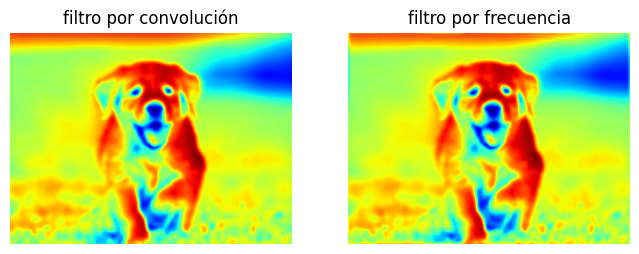

In [27]:
img_c_filter = cv.GaussianBlur(img_orig, ksize=(15, 15), sigmaX=3)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.axis('off')
plt.title("filtro por convolución")
plt.imshow(img_c_filter, cmap='jet')
plt.subplot(1,2,2)
plt.axis('off')
plt.title("filtro por frecuencia")
plt.imshow(img_g_filter, cmap='jet')

print("medida para imagen original: ",frequency_blur_measure(img_orig))
print("medida para imagen filtrada por convolucón: ",frequency_blur_measure(img_c_filter))
print("medida para imagen filtrada por frecuencia: ",frequency_blur_measure(img_g_filter))



### 3. Repetir la comparación usando uno de los métodos descriptos en el apéndice del paper “Analysis of focus measure operators in shape-from-focus”

In [28]:
import cv2
import numpy as np

#implementación del algoritmo de tenengrad

def tenengrad(image):
    # Calcular gradientes en x e y
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1)

    # Gradiente absoluto
    sobel_abs_x = np.absolute(sobel_x)
    sobel_abs_y = np.absolute(sobel_y)

    # Sumar gradientes absolutos
    tenengrad = sobel_abs_x + sobel_abs_y

    # Obtener valor total de Tenengrad
    total = np.sum(tenengrad)

    return total

In [29]:
o_score = tenengrad(img_orig)
c_score = tenengrad(img_c_filter)
g_score = tenengrad(img_g_filter)
print('Puntaje de imagen original:', o_score)
print('Puntaje de imagen filtrada por convolución:', c_score)
print('Puntaje de imagen filtrada por frecuencia:', g_score)
#realizando comparación por tenengrad se observa una alta similitud

Puntaje de imagen original: 7050174.0
Puntaje de imagen filtrada por convolución: 3725100.0
Puntaje de imagen filtrada por frecuencia: 3891394.5187676274
